# `Analysis of Variance (ANOVA) ------------------------`

* ANOVA is used to compare the means of three or more samples.

* While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to encounter a Type I error. If you have a p value of 0.05 for each T-test, once you have run three T-tests, your p is effectively 0.143. ANOVA controls for this error such that the Type I error rate remains at 5%.

```An ANOVA will provide an F-statistic which can, along with degrees of freedom, be used to calculate a p value.```

* ANOVAs assume independence of observations, homogeneity of variances and normally distributed observations within groups.

* This is implemented in scipy by as f_oneway().

### Example

We will use RO Data Set for our ANOVA.

The null hypothesis is that there is no difference between the means

In [1]:
trt0 = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

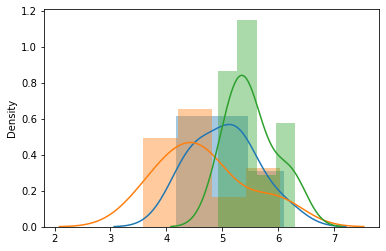

In [3]:
sns.distplot(trt0)
sns.distplot(trt1)
sns.distplot(trt2)

In [4]:
from scipy.stats import f_oneway

f_oneway(trt0,trt1,trt2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

- So we report the result of our ANOVA as (F(2, 27), p=0.016).
- **As p < 0.05, we can reject the null hypothesis**

# `Correlation ------------------------`

Correlation is a measure of linear correlation between two sets of data. It is the covariance of two variables, divided by the product of their standard deviations;

![image](http://zerodha.com/varsity/wp-content/uploads/2017/04/Correlation-Formula.png)

![image](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/Correlation%20Coefficient%20examples.png)

In [5]:
import numpy as np

weights = np.random.normal(60,25,1000)
height = weights + 100 + np.random.normal(0.5,10,1000)

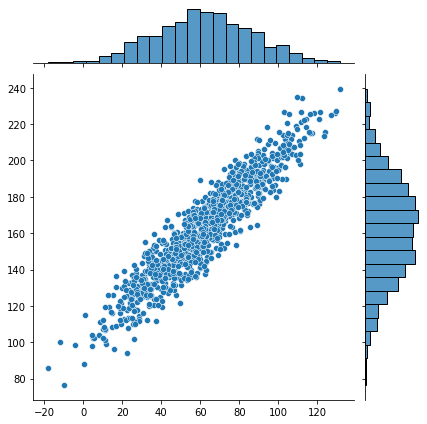

In [6]:
sns.jointplot(weights,height)

In [7]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(weights,height)

In [8]:
correlation # linear increasing -> its close to one

0.9344434153615094

In [9]:
p_value

0.0

# `Chisquare test ------------------------`

- $H_0 - Null Hypothesis(CLAIM)$  - Variable are independent (They are not related)
- $H_A - Alternate Hypothesis(Contradiction)$ - variable are dependent (They are related)

![image](https://sites.google.com/site/skillsa229/_/rsrc/1327153749666/chi-squared/chisqu.gif)

In [10]:
import pandas as pd
data = pd.read_csv("Social_Network_Ads.csv")

In [11]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
two_fre_table = pd.crosstab(data["Gender"],data["Purchased"])
two_fre_table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [13]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_fre_table)

In [14]:
p_value # p > 0.05 I will accepted the null hypothesis

0.45624659183130645

In [15]:
df

1

In [16]:
x2_value

0.5550869364098915

In [17]:
expected_values

array([[131.07,  72.93],
       [125.93,  70.07]])

# `Shapiro-wilk Test`
- The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold). The formula for the W value is:
![](https://www.statisticshowto.com/wp-content/uploads/2014/11/stats.jpg)
where:
- xi are the ordered random sample values
- ai are constants generated from the covariances, variances and means of the sample (size n) from a normally distributed sample.

- The test has limitations, most importantly that the test has a bias by sample size. The larger the sample, the more likely you’ll get a statistically significant result.
## [Shapiro-wilk Test Notebook](http://localhost:8888/notebooks/Statistics/Shapiro%20wilk%20test.ipynb)

# `Mann and Whitney's U-Test`
- Here we are provided two randomly drawn samples and we have to verify whether these two samples is from the same population.

### Assumption:
- All values of both groups are independent of each other.
- The values of the independent variable should be in an ordinal manner (means they can be compared to each other and ranked in order of highest to lowest).
- The variable should be two independent, categorical groups.
- The **null hypothesis** in Mann-Whitney U-test is always the same i.e. there is no significant difference between the two samples.
- **Mann Whitney test is applied to two distribution that need not be normally distributed but should have the same curve shape**.

In [18]:
from scipy.stats import mannwhitneyu

batch_1 = [3,4,2,6,2,5]
batch_2 = [9,7,5,10,8,6]

statistic,p_value = mannwhitneyu(batch_1,batch_2)
print('Statistic :',statistic)
print('p-value :',p_value)
alpha=0.05
if p_value<alpha:
    print('Reject Null Hypothesis (Significant difference between 2 samples)')
else:
    print('Accept Null Hypothesis (No Significant difference between 2 samples)')

Statistic : 2.0
p-value : 0.012591911490379705
Reject Null Hypothesis (Significant difference between 2 samples)


# `2 way ANOVA`

### Step 1: Enter the data.

First, we’ll create a pandas DataFrame that contains the following three variables:

- water: how frequently each plant was watered: daily or weekly
- sun: how much sunlight exposure each plant received: low, medium, or high
- height: the height of each plant (in inches) after two months

In [19]:
import numpy as np
import pandas as pd

#create data
data = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
data[:10]

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


### Step 2: Perform the two-way ANOVA.

- Next, we’ll perform the two-way ANOVA using the **anova_lm()** function from the statsmodels library:

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### perform two-way ANOVA
model = ols('height ~ water + sun + water:sun', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
water,8.533333,1.0,16.0000,0.000527
sun,24.866667,2.0,23.3125,0.000002
water:sun,2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


### Step 3: Interpret the results.

We can see the following p-values for each of the factors in the table:

- **water:** p-value = .000527
- **sun:** p-value = .0000002
- **water*sun:** p-value = .120667
> - Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

- And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is **no significant interaction effect between sunlight exposure and watering frequency**.

> - Note: Although the ANOVA results tell us that watering frequency and sunlight exposure have a statistically significant effect on plant height, we would need to perform post-hoc tests to determine exactly how different levels of water and sunlight affect plant height.

# `END -----------------------------------------------`